In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue May 19 13:47:12 2020

@author: FUJITSU
"""

# -*- coding: utf-8 -*-
"""
Created on Fri May 15 08:20:58 2020

@author: FUJITSU
"""

In [1]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

D:\Instalasi\Anaconda\envs\PythonCPU\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Instalasi\Anaconda\envs\PythonCPU\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Instalasi\Anaconda\envs\PythonCPU\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Instalasi\Anaconda\envs\PythonCPU\lib\site-packages\tensorflow\pyth

In [ ]:
# 1. deklarasi folder untuk menyiapkan data
base_dir = 'D:\\Koding\\Python\\Skripsi Daun Jati\\Dataset\\traingenerator'
train_dir = os.path.join(base_dir, 'train')
validasi_dir = os.path.join(base_dir, 'val')

train_mega_dir = os.path.join(train_dir, 'mega')
train_ph1_dir = os.path.join(train_dir, 'ph1')

validasi_mega_dir = os.path.join(validasi_dir, 'mega')
validasi_ph1_dir = os.path.join(validasi_dir, 'ph1')

In [ ]:
# 2. augmentasi gambar memperbanyak pola gambar
train_datagen = ImageDataGenerator(
                rescale = 1./255,
                rotation_range = 20,
                width_shift_range=0.1,
                height_shift_range=0.1,
                horizontal_flip = True,
                shear_range = 0.2,
                fill_mode = 'nearest'
    )

validasi_datagen = ImageDataGenerator(
                rescale = 1./255,
                rotation_range = 20,
                width_shift_range=0.1,
                height_shift_range=0.1,
                horizontal_flip = True,
                shear_range = 0.1,
                fill_mode = 'nearest'
    )

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size = (256, 256),
                    batch_size = 4,
                    class_mode = 'binary'
    )

validasi_generator = validasi_datagen.flow_from_directory(
                        validasi_dir,
                        target_size = (256, 256),
                        batch_size = 4,
                        class_mode = 'binary'
    )

In [ ]:
# 3. pembuatan arsitektur model CNN
model = tf.keras.models.Sequential([
    
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

In [ ]:
model.summary()

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(),
              metrics = ['accuracy']
              )

In [ ]:
start = datetime.datetime.now()
model.fit(
        train_generator,
        steps_per_epoch = 25,
        epochs = 20,
        validation_data = validasi_generator,
        validation_steps = 10,
        verbose = 2
    )
end = datetime.datetime.now()

In [ ]:
# 7. cek akurasi
loss, acc = model.evaluate(validation_generator, verbose=2)
print("tingkat akurasi model: {:5.2f}%".format(100 * acc))
print("tingkat error model: {}".format(loss))
elapsed = end-start
print ('Time: ', elapsed)

In [ ]:
# 8. simpan pembelajaran model
model.save('D:\\Koding\\Python\\Skripsi Daun Jati\\model\\.h5')

In [2]:
# 9. load model -opsi-
model_baru = tf.keras.models.load_model('D:\\Koding\\Python\\Skripsi Daun Jati\\model\\model_binary.h5')
model_baru.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
ma

In [ ]:
# --- identifikasi kelas pada gambar ---

In [3]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Using TensorFlow backend.


In [13]:
dimensi_gambar = (256,256)
channel = (3,)

In [14]:
def preprocess(gambar, dimensi_gambar):
    nimg = gambar.convert('RGB').resize(dimensi_gambar, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr
def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

[[1.]]
ph1


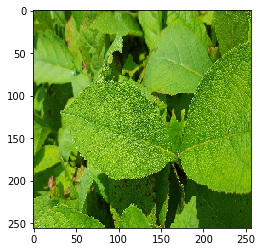

In [15]:
# 10. prediksi
path = 'D:\\Koding\\Python\\Skripsi Daun Jati\\Dataset\\traingenerator\\tes\\13.jpg'
img = image.load_img(path, target_size=(256,256))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
 
images = np.vstack([x])

classes = model_baru.predict(images, batch_size=10)
print(classes)  
  # print(fn) (percobaan untuk google colab)
if classes==0:
    print('mega')
else:
    print('ph1')

[[0.]]
[[0.]]
mega


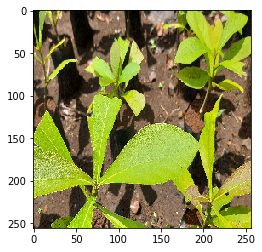

In [18]:
# 10. prediksi
path = 'D:\\Koding\\Python\\Skripsi Daun Jati\\Dataset\\traingenerator\\tes\\1.jpg'
img = image.load_img(path, target_size=(256,256))
imgplot = plt.imshow(img)
x = preprocess(img, dimensi_gambar)
x = reshape([x])
y = model_baru.predict(x)
images = np.vstack([x])
print(y)
classes = model_baru.predict(images, batch_size=10)
print(classes)  
  # print(fn) (percobaan untuk google colab)
if classes==0:
    print('mega')
else:
    print('ph1')